In [26]:
# Concept from LangChain: https://python.langchain.com/en/latest/use_cases/agent_simulations/two_player_dnd.html
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [27]:
from srv.chatlibs.dialogue_agent import DialogueAgent

In [45]:
from srv.chatlibs.dialogue_sim import DialogueSimulator

In [46]:
from srv.chatlibs.image_generator import ImageGenerator

In [28]:
from dotenv import load_dotenv, find_dotenv

In [29]:
load_dotenv(find_dotenv())

True

In [30]:
from langchain.schema import (
    HumanMessage,
    SystemMessage,
)

In [36]:
from langchain.chat_models import ChatOpenAI

In [66]:
from IPython import display

===== Init Lang Vars =====

In [34]:
# system message for story teller (dungeon master)
# (using HumanMessage)
protagonist_name = "Morty"
storyteller_name = "Dungeon Master"
quest = "Rick is missing, you need to fix portal gun to find him."
word_limit = 50

game_description = f"""Here is the topic for a Dungeons & Dragons game: {quest}.
        There is one player in this game: the protagonist, {protagonist_name}.
        The story is narrated by the storyteller, {storyteller_name}."""

game_description

'Here is the topic for a Dungeons & Dragons game: Rick is missing, you need to fix portal gun to find him..\n        There is one player in this game: the protagonist, Morty.\n        The story is narrated by the storyteller, Dungeon Master.'

In [35]:
game_message_desc = HumanMessage(content=
            f"""{game_description}
Please reply with a creative description of the storyteller, {storyteller_name}, in {word_limit} words or less. 
Speak directly to {storyteller_name}.
Do not add anything else.
""")
game_message_desc

HumanMessage(content='Here is the topic for a Dungeons & Dragons game: Rick is missing, you need to fix portal gun to find him..\n        There is one player in this game: the protagonist, Morty.\n        The story is narrated by the storyteller, Dungeon Master.\nPlease reply with a creative description of the storyteller, Dungeon Master, in 50 words or less. \nSpeak directly to Dungeon Master.\nDo not add anything else.\n', additional_kwargs={}, example=False)

In [38]:
player_descriptor_system_message = SystemMessage(
    content="You can add detail to the description of a Dungeons & Dragons player.")
player_descriptor_system_message

SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={})

In [39]:
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(game_message_desc)

In [49]:
prompts

[SystemMessage(content='You can add detail to the description of a Dungeons & Dragons player.', additional_kwargs={}),
 HumanMessage(content='Here is the topic for a Dungeons & Dragons game: Rick is missing, you need to fix portal gun to find him..\n        There is one player in this game: the protagonist, Morty.\n        The story is narrated by the storyteller, Dungeon Master.\nPlease reply with a creative description of the storyteller, Dungeon Master, in 50 words or less. \nSpeak directly to Dungeon Master.\nDo not add anything else.\n', additional_kwargs={}, example=False)]

In [42]:
c = ChatOpenAI(temperature=1.0)(prompts).content
c

'Dungeon Master, you hold the fate of Morty in your hands. Your creative spirit and quick thinking are essential in weaving an epic tale that challenges and delights. Keep the imagination flowing, and watch as Morty braves through the dangers of portals to find his friend.'

In [48]:
generator = ImageGenerator(
        os.environ.get("IMAGE_GENERATION_API_URL"),
        ChatOpenAI(temperature=0.8)
                          )

===== 1. Init Quest Specific Description, Gen Quest Image =====

In [ ]:
# 1a. Generate Specific Quest

In [79]:
questspecifics = ChatOpenAI(temperature=1.0)(

    [
        SystemMessage(content="You can make a task more specific."),
        HumanMessage(content=
            f"""{game_description}
            
            You are the storyteller, {storyteller_name}.
            Please make the quest more specific. Be creative and imaginative.
            Please reply with the specified quest in {word_limit} words or less. 
            Speak directly to the protagonist {protagonist_name}.
            Do not add anything else."""
            )
    ]

)

questspecifics.content

"Morty, to find Rick you must restore an ancient magical crystal in the deepest cave of the Neverend Mountains. Beware of the stealthy goblins and the treacherous ravines. Without the crystal, your portal gun won't function. The clock is ticking, haste is crucial in this dangerous adventure!"

In [80]:
# 1b. Get Image Prompt for Quest Specifc
imageprompt = generator.generate_image_prompt(protagonist_name, questspecifics.content)
# note: character name is appended with "from rick and morty"
imageprompt

'A painting of Morty from Rick and Morty, with an ancient magical crystal, action of restoring, clean backdrop of the Neverend Mountains.'

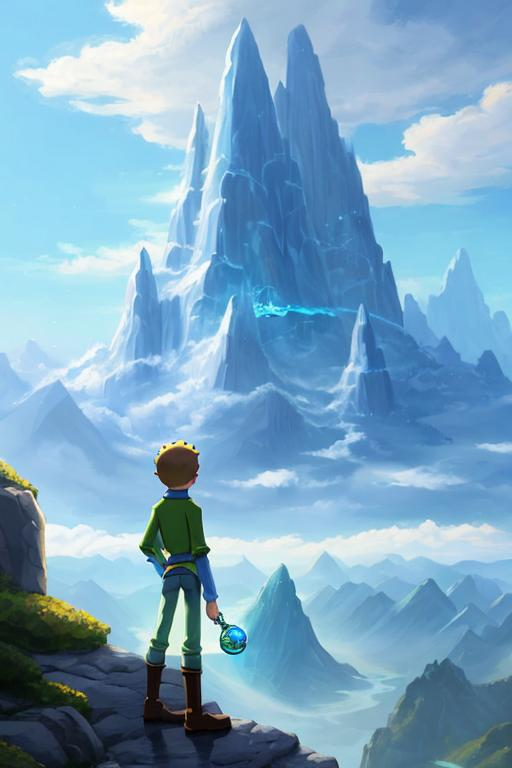

In [81]:
# 1c. Generate image for Quest Specific
questImage64 = generator.generate_image(imageprompt)
display.Image(questImage64)

===== 2. Create Characters =====

In [96]:
# 2a create Dungeon Master
prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=f"""{game_description}
Please reply with a creative description of the storyteller, {storyteller_name}, in {word_limit} words or less. 
Speak directly to {storyteller_name}.
Do not add anything else.
""")
)

dm_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(dm_system_message)

dm_agent = DialogueAgent(
    name=storyteller_name,
    system_message=dm_system_message,
    model=ChatOpenAI(temperature=0.2)
)

print()
print()
print(dm_agent.model)

Dear Dungeon Master, as you narrate the adventures of Morty in his quest to find Rick, your voice booms with authority, yet imbued with a mischievous twinkle in your eye. Your passion for storytelling is evident in the way you bring every character to life, making us all feel like we are part of this fantastical world.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [97]:
# 2b. create Protoganist

prompts = []
prompts.append(player_descriptor_system_message)
prompts.append(
    HumanMessage(content=
            f"""
{game_description}
Please reply with a creative description of the protagonist, {protagonist_name}, in {word_limit} words or less. 
Speak directly to {protagonist_name}.
Do not add anything else.            
""")
)

protoganist_system_message = ChatOpenAI(temperature=1.0)(prompts).content
print(protoganist_system_message)


protoganist_agent = DialogueAgent(
    name=storyteller_name,
    system_message=protoganist_system_message,
    model=ChatOpenAI(temperature=0.2)
)


print()
print()
print(protoganist_agent.model)

Morty, you're a timid yet curious adventurer with a heart of gold. Your loyalty to your loved ones often makes you underestimate your own abilities. Will you overcome your fears to save your friend Rick? The fate of the multiverse rests upon your shoulders.


verbose=False callbacks=None callback_manager=None client=<class 'openai.api_resources.chat_completion.ChatCompletion'> model_name='gpt-3.5-turbo' temperature=0.2 model_kwargs={} openai_api_key=None openai_api_base=None openai_organization=None request_timeout=None max_retries=6 streaming=False n=1 max_tokens=None


In [98]:
# 2c. init Dialogue Sim
# Dialogue Sim Object here just provides a function to inject replied story message to Agents in Character List
character_list = [dm_agent, protoganist_agent]
simulator = DialogueSimulator(character_list)

===== 3. Start Convos =====

In [99]:
# 3a. Inject Specific Quest To Start
simulator.reset()
simulator.inject(storyteller_name, questspecifics.content)
questspecifics.content

"Morty, to find Rick you must restore an ancient magical crystal in the deepest cave of the Neverend Mountains. Beware of the stealthy goblins and the treacherous ravines. Without the crystal, your portal gun won't function. The clock is ticking, haste is crucial in this dangerous adventure!"

In [101]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "I am ready. What time is it now?")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

"It's already midday, Morty. You better hurry if you want to make it to the cave before nightfall. The journey is long and perilous. Are you sure you're ready for this?"

In [102]:
# Convo here is altered to start with User/Protoganist so that
# DM can reply its reaction
# 1st Inject Dialogue Sim with User message 
# Then 2nd Inject Dialogue Sim with 
simulator.inject(protagonist_name, "I have hurried over to Rick's garage and acquired the map to Neverend Mountains. Taking his ship")
responded_narrative = dm_agent.send() # send will feed entire message history so far so that AI completes the rest

simulator.inject(storyteller_name, responded_narrative)

responded_narrative

"As you take off in Rick's ship, you can feel the wind rushing past you and the hum of the engines vibrating through the metal floor. The map shows a winding path through the mountains, with several possible routes to take. You'll need to make quick decisions and stay alert for any dangers that may arise. The journey ahead will test your courage and your wits. Are you ready, Morty?"

===== 4. Print Diagnostics =====

In [104]:
simulator.agents[0].message_history

['Here is the conversation so far.',
 "Dungeon Master: Morty, to find Rick you must restore an ancient magical crystal in the deepest cave of the Neverend Mountains. Beware of the stealthy goblins and the treacherous ravines. Without the crystal, your portal gun won't function. The clock is ticking, haste is crucial in this dangerous adventure!",
 'Morty: I am ready. What time is it now?',
 "Dungeon Master: It's already midday, Morty. You better hurry if you want to make it to the cave before nightfall. The journey is long and perilous. Are you sure you're ready for this?",
 "Morty: I have hurried over to Rick's garage and acquired the map to Neverend Mountains. Taking his ship",
 "Dungeon Master: As you take off in Rick's ship, you can feel the wind rushing past you and the hum of the engines vibrating through the metal floor. The map shows a winding path through the mountains, with several possible routes to take. You'll need to make quick decisions and stay alert for any dangers tha